In [ ]:
!pip install pyarrow

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [147]:
root_data_url = "https://github.com/muziejus/coms-w4995-applied-machine-learning-project/raw/refs/heads/main/data"
companies = ["dltr", "lulu", "ulta", "wba", "wmt"]
dataframes = []
for company in companies:
    df = pd.read_parquet(f"{root_data_url}/{company}_merged_data.parquet")
    df['Month'] = df.index.month
    df['DayOfWeek'] = df.index.day_name()
    df['Company'] = company.upper()
    dataframes.append(df)

org_df = pd.concat(dataframes)
print(org_df.columns)

Index(['analyzed_bpe_tokens', 'weighted_sentiment', 'weighted_error',
       'analyzed_naive_tokens', 'daily_naive_token_sum',
       'analyzed_article_count', 'daily_article_count',
       'sentiment_3d_rolling_mean', 'sentiment_7d_rolling_mean',
       'sentiment_14d_rolling_mean', 'open', 'high', 'low', 'close', 'volume',
       'dividends', 'stock_splits', 'cpi', 'pce', 'ppi', 'eci', 'gdp',
       'unemployment', 'manufacturing', 'sp500', 'price_3d_rolling_mean',
       'price_3d_rolling_std', 'volume_3d_rolling_mean',
       'volume_3d_rolling_std', 'bollinger_3d_upper_band',
       'bollinger_3d_lower_band', 'price_7d_rolling_mean',
       'price_7d_rolling_std', 'volume_7d_rolling_mean',
       'volume_7d_rolling_std', 'bollinger_7d_upper_band',
       'bollinger_7d_lower_band', 'price_14d_rolling_mean',
       'price_14d_rolling_std', 'volume_14d_rolling_mean',
       'volume_14d_rolling_std', 'bollinger_14d_upper_band',
       'bollinger_14d_lower_band', 'target', 'target_pric

In [148]:
missing_values = org_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df = org_df.dropna()
print(f"{df.shape[0]}")

Missing values in each column:
 analyzed_bpe_tokens           3021
weighted_sentiment            3021
weighted_error                3021
analyzed_naive_tokens         3021
daily_naive_token_sum         3021
analyzed_article_count        3021
daily_article_count           3021
sentiment_3d_rolling_mean     3031
sentiment_7d_rolling_mean     3051
sentiment_14d_rolling_mean    3086
open                          3290
high                          3290
low                           3290
close                         3290
volume                        3290
dividends                     3290
stock_splits                  3290
cpi                              0
pce                              0
ppi                              0
eci                              0
gdp                              0
unemployment                     0
manufacturing                    0
sp500                            5
price_3d_rolling_mean         3300
price_3d_rolling_std          3300
volume_3d_rolling_mean 

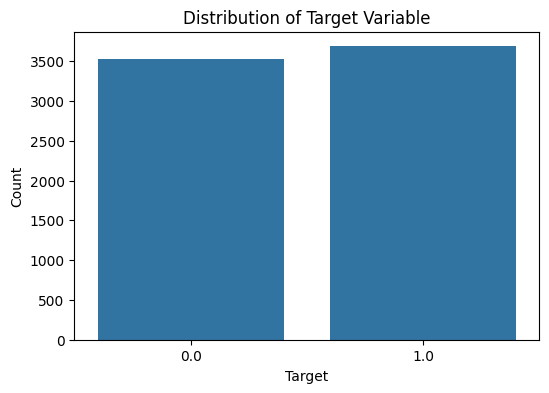

In [149]:
# Using Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [150]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=105
)

# SVM Model

In [151]:
categorical_features = ['Month', 'DayOfWeek', 'Company']
numerical_features = X.columns.drop(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['analyzed_bpe_tokens', 'weighted_sentiment', 'weighted_error',
       'analyzed_naive_tokens', 'daily_naive_token_sum',
       'analyzed_article_count', 'daily_article_count',
       'sentiment_3d_rolling_mean', 'sentiment_7d_rolling_mean',
       'sentiment_14d_rolling_mean', 'open', 'high', '...
       'volume_7d_rolling_std', 'bollinger_7d_upper_band',
       'bollinger_7d_lower_band', 'price_14d_rolling_mean',
       'price_14d_rolling_std', 'volume_14d_rolling_mean',
       'volume_14d_rolling_std', 'bollinger_14d_upper_band',
       'bollinger_14d_lower_band', 'target_price'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['Month', 'DayOfWeek',
                                                   'Company'])])),
                ('classifier', SVC(random_state=42))])

Accuracy on test data: 52.98%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.42      0.47       707
         1.0       0.53      0.63      0.58       737

    accuracy                           0.53      1444
   macro avg       0.53      0.53      0.52      1444
weighted avg       0.53      0.53      0.52      1444



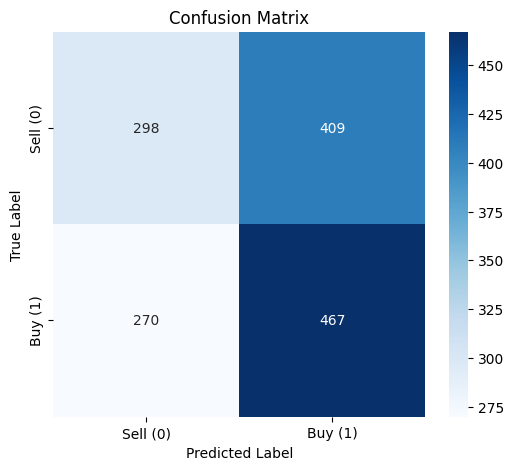

In [152]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Sell (0)', 'Buy (1)'],
    yticklabels=['Sell (0)', 'Buy (1)']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# XGBooost Model

In [153]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=105
)

In [161]:
categorical_features = ['Month', 'DayOfWeek', 'Company']
numerical_features = X.columns.drop(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        eval_metric='logloss'
    ))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['analyzed_bpe_tokens', 'weighted_sentiment', 'weighted_error',
       'analyzed_naive_tokens', 'daily_naive_token_sum',
       'analyzed_article_count', 'daily_article_count',
       'sentiment_3d_rolling_mean', 'sentiment_7d_rolling_mean',
       'sentiment_14d_rolling_mean', 'open', 'high', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Accuracy on test data: 64.96%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.57      0.61       707
         1.0       0.64      0.72      0.68       737

    accuracy                           0.65      1444
   macro avg       0.65      0.65      0.65      1444
weighted avg       0.65      0.65      0.65      1444


Confusion Matrix:
 [[404 303]
 [203 534]]


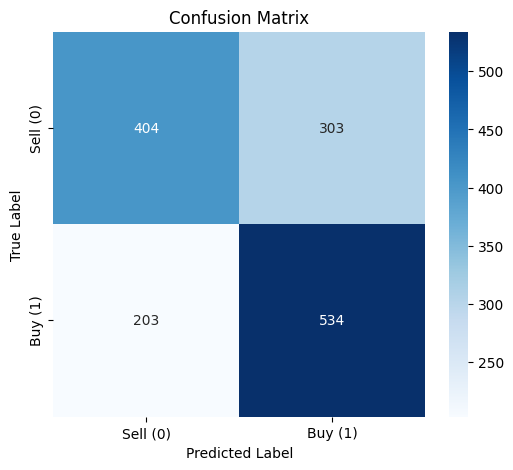

In [162]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Sell (0)', 'Buy (1)'],
    yticklabels=['Sell (0)', 'Buy (1)']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()